# Audio Processing

In [1]:
from preprocess import Audio_Processor
import os
import warnings
import pandas as pd
import time
from data_utils import enumerate_strings
import numpy as np

Using TensorFlow backend.


Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.


/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
# Able to specify which GPU to use
os.environ["CUDA_VISIBLE_DEVICES"]="0"
warnings.filterwarnings('ignore')
SR = 16000

## ESC-50

In [3]:
path_to_db='../ESC-50/'
ps = Audio_Processor(path_to_db + 'audio/', sr=SR, debug=False)
dataset = pd.read_csv(path_to_db + 'meta/esc50.csv')
classes = [None] * 50

In [4]:
h_classes = ['Human & Animal', 'Interacting Materials']
mapping = {
    'dog': 0,
    'rooster': 0,
    'pig': 0,
    'cow': 0,
    'frog': 0,
    'cat': 0,
    'hen': 0,
    'insects': 0,
    'sheep': 0,
    'crow': 0,
    'rain': 1,
    'sea_waves': 1,
    'crackling_fire': 1,
    'crickets': 0,
    'chirping_birds': 0,
    'water_drops': 1,
    'wind': 1,
    'pouring_water': 1,
    'toilet_flush': 1,
    'thunderstorm': 1,
    'crying_baby': 0,
    'sneezing': 0,
    'clapping': 1,
    'breathing': 0,
    'coughing': 0,
    'footsteps': 1,
    'laughing': 0,
    'brushing_teeth': 1,
    'snoring': 0,
    'drinking_sipping': 1,
    'door_wood_knock': 1,
    'mouse_click': 1,
    'keyboard_typing': 1,
    'door_wood_creaks': 1,
    'can_opening': 1,
    'washing_machine': 1,
    'vacuum_cleaner': 1,
    'clock_alarm': 1,
    'clock_tick': 1,
    'glass_breaking':1,
    'helicopter': 1,
    'chainsaw': 1,
    'siren': 1,
    'car_horn': 1,
    'engine': 1,
    'train': 1,
    'church_bells': 1,
    'airplane': 1,
    'fireworks': 1,
    'hand_saw': 1,
}

In [5]:
dataset['h_target'] = None
for index, row in dataset.iterrows():
    target = row['target']
    classes[target] = row['category']
    dataset.loc[index, 'h_target'] = mapping[row['category']]

In [6]:
esc_time = []

### Quarter-Second Blocksize

In [7]:
blocksize = int(SR/4)
overlap = int(SR/8)

In [8]:
s_time = time.time()
df = ps.preprocess_fold(dataset, 
                        kind='mfcc', 
                        blocksize=blocksize, 
                        overlap=overlap,
                        feature_bag=False
                       )
esc_time.append(time.time() - s_time)

Preprocess file not found, building new one
Epoch 1/1
2/2 [==============================] - 0s 73ms/step - loss: 1.3478
	Bytes: 48080
	Processing Time: 848.3740379810333


In [9]:
df.head()

,target,h_target,metadata
0,0,0,mfcc_2_std mfcc_2_mean mfcc_2_noise mfcc...
1,14,0,mfcc_2_std mfcc_2_mean mfcc_2_noise mfc...
2,36,1,mfcc_2_std mfcc_2_mean mfcc_2_noise mfc...
3,36,1,mfcc_2_std mfcc_2_mean mfcc_2_noise mfc...
4,19,1,mfcc_2_std mfcc_2_mean mfcc_2_noise mfc...


### Half-Second Blocksize

In [10]:
blocksize = int(SR/2)
overlap = int(SR/4)

In [11]:
s_time = time.time()
df = ps.preprocess_fold(dataset, 
                        kind='mfcc', 
                        blocksize=blocksize, 
                        overlap=overlap,
                        feature_bag=False
                       )
esc_time.append(time.time() - s_time)

Preprocess file not found, building new one
Epoch 1/1
2/2 [==============================] - 0s 66ms/step - loss: 1.3441
	Bytes: 48080
	Processing Time: 688.8655118942261


In [12]:
df.head()

,target,h_target,metadata
0,0,0,mfcc_2_std mfcc_2_mean mfcc_2_noise mfcc...
1,14,0,mfcc_2_std mfcc_2_mean mfcc_2_noise mfc...
2,36,1,mfcc_2_std mfcc_2_mean mfcc_2_noise mfc...
3,36,1,mfcc_2_std mfcc_2_mean mfcc_2_noise mfc...
4,19,1,mfcc_2_std mfcc_2_mean mfcc_2_noise mfc...


### 1 Second Blocksize

In [13]:
blocksize = int(SR)
overlap = int(SR/2)

In [14]:
s_time = time.time()
df = ps.preprocess_fold(dataset, 
                        kind='mfcc', 
                        blocksize=blocksize, 
                        overlap=overlap,
                        feature_bag=False
                       )
esc_time.append(time.time() - s_time)

Preprocess file not found, building new one
Epoch 1/1
2/2 [==============================] - 0s 73ms/step - loss: 1.3394
	Bytes: 48080
	Processing Time: 604.8991174697876


In [15]:
df.head()

,target,h_target,metadata
0,0,0,mfcc_2_std mfcc_2_mean mfcc_2_noise mfcc...
1,14,0,mfcc_2_std mfcc_2_mean mfcc_2_noise mfcc...
2,36,1,mfcc_2_std mfcc_2_mean mfcc_2_noise mfcc...
3,36,1,mfcc_2_std mfcc_2_mean mfcc_2_noise mfcc...
4,19,1,mfcc_2_std mfcc_2_mean mfcc_2_noise mfcc...


### 2 Second Blocksize

In [16]:
blocksize = int(SR * 2)
overlap = int(SR)

In [17]:
s_time = time.time()
df = ps.preprocess_fold(dataset, 
                        kind='mfcc', 
                        blocksize=blocksize, 
                        overlap=overlap,
                        feature_bag=False
                       )
esc_time.append(time.time() - s_time)

Preprocess file not found, building new one
Epoch 1/1
2/2 [==============================] - 0s 74ms/step - loss: 1.3292
	Bytes: 48080
	Processing Time: 516.2489624023438


In [18]:
df.head()

,target,h_target,metadata
0,0,0,mfcc_2_std mfcc_2_mean mfcc_2_noise mfcc...
1,14,0,mfcc_2_std mfcc_2_mean mfcc_2_noise mfcc...
2,36,1,mfcc_2_std mfcc_2_mean mfcc_2_noise mfcc...
3,36,1,mfcc_2_std mfcc_2_mean mfcc_2_noise mfcc...
4,19,1,mfcc_2_std mfcc_2_mean mfcc_2_noise mfcc...


### 5 Second Blocksize

In [ ]:
blocksize = int(SR * 5)
overlap = 0

In [ ]:
s_time = time.time()
df = ps.preprocess_fold(dataset, 
                        kind='mfcc', 
                        blocksize=blocksize, 
                        overlap=overlap,
                        feature_bag=False
                       )
esc_time.append(time.time() - s_time)

Preprocess file not found, building new one
Epoch 1/1
2/2 [==============================] - 0s 82ms/step - loss: 1.3323
	Bytes: 48080
	Processing Time: 336.3021652698517


In [ ]:
print(esc_time)

[848.8643431663513, 689.317474603653, 605.2313168048859, 516.6313512325287, 336.43653893470764]


## Freesound Dataset

In [ ]:
path_to_db = '../../data/FSDKaggle2018/'
dataset = pd.read_csv(path_to_db + 'meta/train.csv')
dataset = dataset.drop(['manually_verified', 'freesound_id', 'license'], axis=1)
fs_ps = Audio_Processor(path_to_db + 'train/')
classes = dataset.label.unique()

In [ ]:
h_classes = ['Human & Animal', 'Interacting Materials', 'Musical Instruments']
mapping = {'Hi-hat': h_classes[2],
           'Saxophone': h_classes[2],
           'Trumpet': h_classes[2],
           'Glockenspiel': h_classes[2],
           'Cello': h_classes[2],
           'Knock': h_classes[1],
           'Gunshot_or_gunfire': h_classes[1],
           'Clarinet': h_classes[2],
           'Computer_keyboard': h_classes[1],
           'Keys_jangling': h_classes[1],
           'Snare_drum': h_classes[2],
           'Writing': h_classes[1],
           'Laughter': h_classes[0],
           'Tearing': h_classes[1],
           'Fart': h_classes[1],
           'Oboe': h_classes[2],
           'Flute': h_classes[2],
           'Cough': h_classes[0],
           'Telephone': h_classes[1],
           'Bark': h_classes[0],
           'Chime': h_classes[2],
           'Bass_drum': h_classes[2],
           'Bus': h_classes[1],
           'Squeak': h_classes[0],
           'Scissors': h_classes[1],
           'Harmonica': h_classes[2],
           'Gong': h_classes[2],
           'Microwave_oven': h_classes[1],
           'Burping_or_eructation': h_classes[0],
           'Double_bass': h_classes[2],
           'Shatter': h_classes[1],
           'Fireworks': h_classes[1],
           'Tambourine': h_classes[2],
           'Cowbell': h_classes[2],
           'Electric_piano': h_classes[2],
           'Meow': h_classes[0],
           'Drawer_open_or_close': h_classes[1],
           'Applause': h_classes[1],
           'Acoustic_guitar': h_classes[2],
           'Violin_or_fiddle': h_classes[2],
           'Finger_snapping': h_classes[1]
           }

In [ ]:
dataset['h_target'] = None
for index, row in dataset.iterrows():
    row['target'] = np.where(classes == row['label'])
    dataset.loc[index, 'h_target'] = mapping[row['label']]
dataset.columns = ['filename', 'target', 'h_target']
enum_map = enumerate_strings(dataset, ['filename'])

In [ ]:
fsd_time = []

### Quarter-second Blocksize

In [ ]:
blocksize = int(SR/4)
overlap = int(SR/8)

In [ ]:
s_time = time.time()
df = fs_ps.preprocess_fold(dataset, 
                        kind='mfcc', 
                        blocksize=blocksize, 
                        overlap=overlap,
                        feature_bag=False
                       )
fsd_time.append(time.time() - s_time)

Preprocess file not found, building new one
Epoch 1/1
2/2 [==============================] - 0s 85ms/step - loss: 1.3401
	Bytes: 227432
	Processing Time: 6038.907981395721


### Half-second Blocksize

In [ ]:
blocksize = int(SR/2)
overlap = int(SR/4)

In [ ]:
s_time = time.time()
df = fs_ps.preprocess_fold(dataset, 
                        kind='mfcc', 
                        blocksize=blocksize, 
                        overlap=overlap,
                        feature_bag=False
                       )
fsd_time.append(time.time() - s_time)

Preprocess file not found, building new one
Epoch 1/1
2/2 [==============================] - 0s 106ms/step - loss: 1.3320
	Bytes: 227432
	Processing Time: 5022.06161236763


### 1 Second Blocksize

In [ ]:
blocksize = int(SR)
overlap = int(SR/2)

In [ ]:
s_time = time.time()
df = fs_ps.preprocess_fold(dataset, 
                        kind='mfcc', 
                        blocksize=blocksize, 
                        overlap=overlap,
                        feature_bag=False
                       )
fsd_time.append(time.time() - s_time)

Preprocess file not found, building new one


### 2 Second Blocksize

In [ ]:
blocksize = int(SR * 2)
overlap = int(SR)

In [ ]:
s_time = time.time()
df = fs_ps.preprocess_fold(dataset, 
                        kind='mfcc', 
                        blocksize=blocksize, 
                        overlap=overlap,
                        feature_bag=False
                       )
fsd_time.append(time.time() - s_time)

### 5 Second Blocksize

In [ ]:
blocksize = int(SR * 5)
overlap = SR

In [ ]:
s_time = time.time()
df = fs_ps.preprocess_fold(dataset, 
                        kind='mfcc', 
                        blocksize=blocksize, 
                        overlap=overlap,
                        feature_bag=False
                       )
fsd_time.append(time.time() - s_time)

In [ ]:
print(fsd_time)

In [ ]:
len(df)

## Time Analysis

In [43]:
time_df = {
    'Blocksize': list(),
    'ESC-50': list(),
    'FSD': list(),
    'ESC-50-Per-File': list(),
    'FSD-Per-File':list()
}
blocksizes = [0.25, 0.5, 1.0, 2.0, 5.0]
for i in range(len(fsd_time)):
    time_df['Blocksize'].append(blocksizes[i])
    time_df['ESC-50'].append(esc_time[i])
    time_df['FSD'].append(fsd_time[i])
    time_df['ESC-50-Per-File'].append(esc_time[i]/2000)
    time_df['FSD-Per-File'].append(fsd_time[i]/9473)
time_df = pd.DataFrame(time_df)

In [44]:
time_df

,Blocksize,ESC-50,ESC-50-Per-File,FSD,FSD-Per-File
0,0.25,848.864343,0.424432,6041.240667,0.637733
1,0.50,689.317475,0.344659,5023.656924,0.530313
2,1.00,605.231317,0.302616,4452.629480,0.470034
3,2.00,516.631351,0.258316,4118.794499,0.434793
4,5.00,336.436539,0.168218,3272.555465,0.345461


Text(0.5, 0, 'Window (s)')

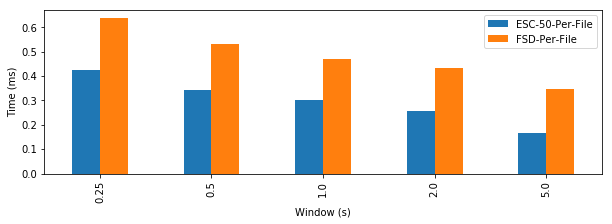

In [45]:
ax = time_df.plot(x='Blocksize', 
                  y=['ESC-50-Per-File', 'FSD-Per-File'], 
                  xticks=[0.25, 0.5, 1.0, 2.0, 5.0],
                  figsize=(10,3),
                  kind='bar'
                 )
ax.set_ylabel('Time (ms)')
ax.set_xlabel('Window (s)')

# Single File Load

In [46]:
blocksize = int(SR/4)
overlap = int(SR/8)

In [47]:
s_time = time.time()
ps.preprocess_file('3-150979-C-40.wav',
                   kind='mfcc',
                   blocksize=blocksize,
                   overlap=overlap,
                   bag_of_features=False
                  )
f_time = time.time() - s_time

AttributeError: 'Audio_Processor' object has no attribute '_Audio_Processor__load_file'